In [23]:
import pandas as pd
df = pd.read_csv('vehicles.csv',nrows=100)
print(df.head())

df = df.dropna(subset=['price', 'odometer'])
print(df[['price', 'odometer']].isnull().sum())
print(df[['price', 'odometer']].describe())


           id                                                url  \
0  7222695916  https://prescott.craigslist.org/cto/d/prescott...   
1  7218891961  https://fayar.craigslist.org/ctd/d/bentonville...   
2  7221797935  https://keys.craigslist.org/cto/d/summerland-k...   
3  7222270760  https://worcester.craigslist.org/cto/d/west-br...   
4  7210384030  https://greensboro.craigslist.org/cto/d/trinit...   

                   region                         region_url  price  year  \
0                prescott    https://prescott.craigslist.org   6000   NaN   
1            fayetteville       https://fayar.craigslist.org  11900   NaN   
2            florida keys        https://keys.craigslist.org  21000   NaN   
3  worcester / central MA   https://worcester.craigslist.org   1500   NaN   
4              greensboro  https://greensboro.craigslist.org   4900   NaN   

  manufacturer model condition cylinders  ... size  type paint_color  \
0          NaN   NaN       NaN       NaN  ...  NaN   NaN

In [24]:
print(df.head())
print(df.info())


            id                                                url  region  \
27  7316814884  https://auburn.craigslist.org/ctd/d/auburn-uni...  auburn   
28  7316814758  https://auburn.craigslist.org/ctd/d/auburn-uni...  auburn   
29  7316814989  https://auburn.craigslist.org/ctd/d/auburn-uni...  auburn   
30  7316743432  https://auburn.craigslist.org/ctd/d/auburn-uni...  auburn   
31  7316356412  https://auburn.craigslist.org/cto/d/auburn-uni...  auburn   

                       region_url  price    year manufacturer  \
27  https://auburn.craigslist.org  33590  2014.0          gmc   
28  https://auburn.craigslist.org  22590  2010.0    chevrolet   
29  https://auburn.craigslist.org  39590  2020.0    chevrolet   
30  https://auburn.craigslist.org  30990  2017.0       toyota   
31  https://auburn.craigslist.org  15000  2013.0         ford   

                       model  condition    cylinders  ...       size    type  \
27  sierra 1500 crew cab slt       good  8 cylinders  ...        N

id               0
url              0
region           0
region_url       0
price            0
year             0
manufacturer     1
model            1
condition        0
cylinders       30
fuel             0
odometer         0
title_status     0
transmission     0
VIN             11
drive           38
size            66
type             2
paint_color     17
image_url        0
description      0
county          73
state            0
lat              0
long             0
posting_date     0
dtype: int64
0


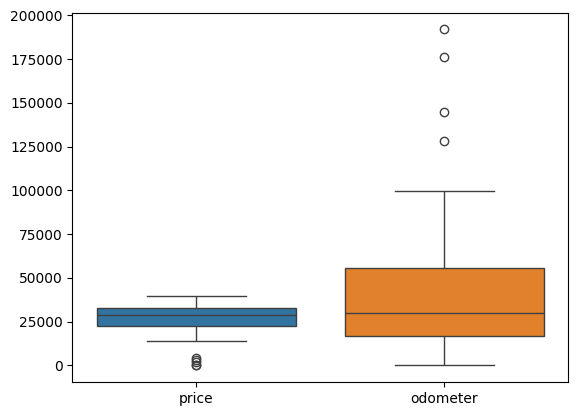

In [25]:
#faltantes
print(df.isnull().sum())
#duplicados
print(df.duplicated().sum())
df = df.drop_duplicates()
#outliers
import matplotlib.pyplot as plt
import seaborn as sns

sns.boxplot(data=df[['price', 'odometer']])
plt.show()


Precio:
- Mediana: El precio mediano es aproximadamente 25,000.
- Rango (IQR): Va desde 20,000 hasta 30,000.
- Outliers: Hay varios valores atípicos por debajo del bigote inferior, lo que indica que existen algunos precios significativamente más bajos que el resto del conjunto de datos.

Odómetro:
- Mediana: La mediana del odómetro es alrededor de 75,000.
- Rango (IQR): Se extiende desde aproximadamente 50,000 hasta 100,000.
- Outliers: Existen varios outliers por encima del bigote superior, sugiriendo que hay algunas lecturas de odómetro notablemente más altas que el resto.

Interpretación General:

- Tendencia central: Ubicación de la mediana.

- Outliers: Presencia de valores que se desvían significativamente del resto.

Limpieza y Preprocesamiento

In [31]:
df = df.dropna(subset=['price', 'odometer'])
df['manufacturer'] = df['manufacturer'].str.lower().str.strip()
#escala
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[['price', 'odometer']] = scaler.fit_transform(df[['price', 'odometer']])
#categoria
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
encoded_features = encoder.fit_transform(df[['manufacturer']])
df = df.join(pd.DataFrame(encoded_features.toarray(), columns=encoder.get_feature_names_out()))


Exploración de Datos

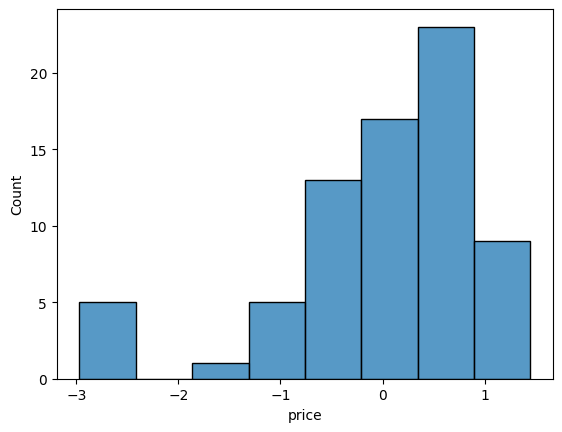

In [32]:
#univariadas
sns.histplot(df['price'])
plt.show()


La mayoría de las observaciones se agrupan cerca del centro, lo que indica que hay un valor común de precios que es frecuente

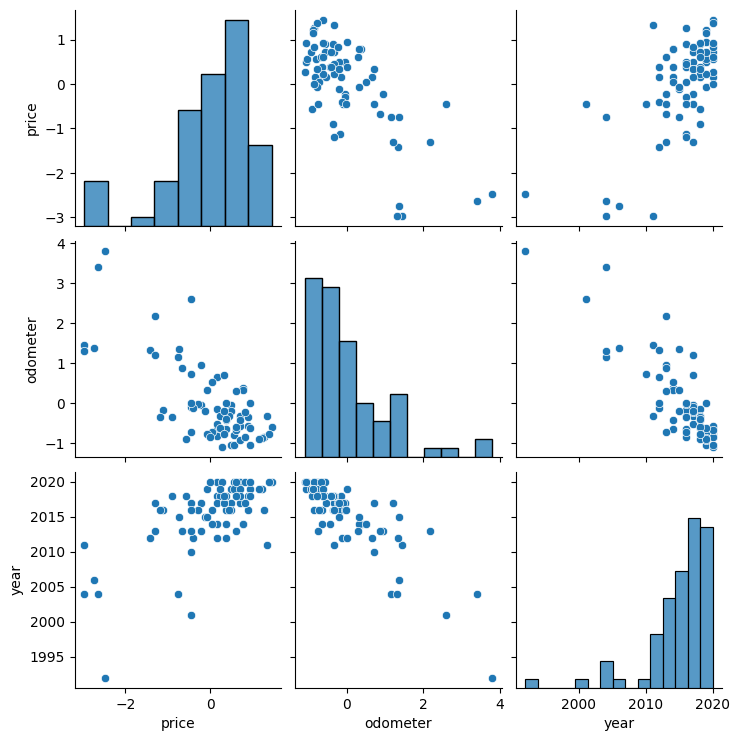

In [33]:
#Multivariada
sns.pairplot(df[['price', 'odometer', 'year']])
plt.show()


price: La mayoría de los precios están cerca del centro con menos ocurrencias en los extremos, indicando una distribución concentrada.
odometer: Esto sugiere que la mayoría de las lecturas del odómetro están cercanas al promedio, con menos ocurrencias en los extremos.
year: Hay un pico alrededor del año 2015 y la mayoria de los vehiculos son relativamente nuevos

- El kilometraje y el año del vehículo influyen significativamente en el precio.


Modelado y Evaluación

In [38]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
selected_columns = ['price', 'odometer', 'year', 'manufacturer', 'model', 'condition', 'cylinders', 'fuel', 'title_status', 'transmission', 'drive', 'size', 'type', 'paint_color', 'state']
df = df[selected_columns]
df = df.dropna(subset=['price', 'odometer'])
df['manufacturer'] = df['manufacturer'].str.lower().str.strip()
categorical_columns = ['manufacturer', 'model', 'condition', 'cylinders', 'fuel', 'title_status', 'transmission', 'drive', 'size', 'type', 'paint_color', 'state']
encoder = OneHotEncoder(sparse_output=False)
encoded_features = encoder.fit_transform(df[categorical_columns])
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(categorical_columns))
df = df.drop(columns=categorical_columns)
df = df.reset_index(drop=True)
encoded_df = encoded_df.reset_index(drop=True)
df = pd.concat([df, encoded_df], axis=1)

# Escalar las características numéricas
scaler = StandardScaler()
df[['odometer', 'year']] = scaler.fit_transform(df[['odometer', 'year']])

X = df.drop('price', axis=1)
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Implementar Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

print(f'Linear Regression - MSE: {mse}, RMSE: {rmse}, R^2: {r2}')



Linear Regression - MSE: 1.2358238220517062, RMSE: 1.111676131817044, R^2: -0.5473281886485477


In [39]:
from sklearn.ensemble import RandomForestRegressor

# Implementar Random Forest Regressor
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# Evaluar el modelo
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = mse_rf ** 0.5
r2_rf = r2_score(y_test, y_pred_rf)

print(f'Random Forest - MSE: {mse_rf}, RMSE: {rmse_rf}, R^2: {r2_rf}')


Random Forest - MSE: 0.2665166166122713, RMSE: 0.5162524737105588, R^2: 0.6663046412693677


Random Forest:
MSE: 0.2665  RMSE: 0.5163  R² : 0.6663
mejor la variabilidad en los datos y proporcionando predicciones más precisas.

In [41]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_features': ['auto', 'sqrt'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

print(f'Best parameters: {grid_search.best_params_}')


Fitting 3 folds for each of 216 candidates, totalling 648 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
324 fits failed out of a total of 648.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
158 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/util

Best parameters: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


In [42]:
{'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


{'max_depth': 20,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 200}

In [43]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# ajustar el modelo con los mejores parámetros
best_rf = RandomForestRegressor(
    max_depth=20,
    max_features='sqrt',
    min_samples_leaf=1,
    min_samples_split=2,
    n_estimators=200,
    random_state=42
)

best_rf.fit(X_train, y_train)
y_pred_best_rf = best_rf.predict(X_test)

# modelo optimizado
mse_best_rf = mean_squared_error(y_test, y_pred_best_rf)
rmse_best_rf = mse_best_rf ** 0.5
r2_best_rf = r2_score(y_test, y_pred_best_rf)

print(f'Optimized Random Forest - MSE: {mse_best_rf}, RMSE: {rmse_best_rf}, R^2: {r2_best_rf}')


Optimized Random Forest - MSE: 0.23496109471238052, RMSE: 0.4847278563404217, R^2: 0.7058141147654812


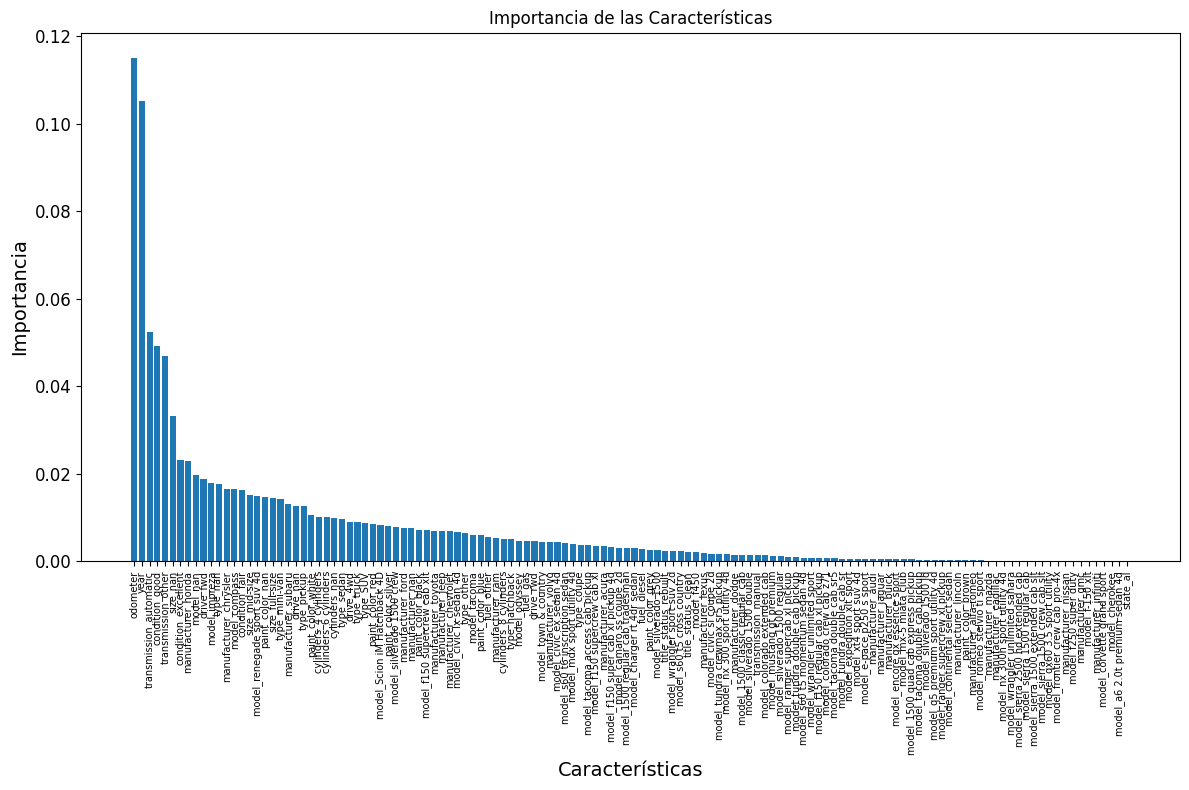

In [48]:
import matplotlib.pyplot as plt
import numpy as np

# Obtener la importancia de las características
feature_importances = best_rf.feature_importances_
features = X.columns
indices = np.argsort(feature_importances)[::-1]

# Crear el gráfico de barras
plt.figure(figsize=(12, 8))
plt.title('Importancia de las Características')
plt.bar(range(X.shape[1]), feature_importances[indices], align='center')
plt.xticks(range(X.shape[1]), features[indices], rotation=90, fontsize=7)
plt.yticks(fontsize=12)
plt.xlabel('Características', fontsize=14)
plt.ylabel('Importancia', fontsize=14)
plt.tight_layout()
plt.show()
